In [1]:
import pandapower as pp #import pandapower
from tqdm import tqdm
import numpy as np
import pandas as pd
import pandapower.networks as pn 
from pandapower.estimation import estimate,chi2_analysis,remove_bad_data
import pandapower.plotting as plot
%matplotlib inline
import matplotlib.pyplot as plt

## IEEE 39-Bus System
The “IEEE 39 bus system is well known as 10-machine New-England Power System. Generator 1 represents the aggregation of a large number of generators.
<img src="IEEE39.png" width="600">

In [3]:
df_bus = pd.read_excel('39busbar-data-second-try.xlsx', sheet_name='BusEntry_normal')
df_bus['busnnumber'] = df_bus['busnnumber']-1
df_bus_real = df_bus[['busnnumber', 'busFinalVoltage', 'busFinalDegree', 'busLoadMW', 'busLoadMVAR', 'busGenerationMW', 'busGenerationMVAR']]

## Parameter Errors

In [4]:
numindex = []
rmsese = []
rmsesea = []


bus_real_arr = df_bus_real.values
sigma_vm = 0.1
sigma_p = 0.1
sigma_q = 0.1
measurment_index = bus_real_arr[:,0].astype(int)
measurment_vm = bus_real_arr[:,1] + np.random.normal(0,sigma_vm,39)
measurment_p = (bus_real_arr[:,5]- bus_real_arr[:,3])+ np.random.normal(0,sigma_p,39)
measurment_q = (bus_real_arr[:,6]- bus_real_arr[:,4]) + np.random.normal(0,sigma_q,39)

for i in np.arange(0,1500,10):
    net = pn.case39()
    pp.runpp(net)
    net.line['c_nf_per_km'] = net.line['c_nf_per_km']+ np.random.normal(0,i,35)
    
    net.measurement.drop(net.measurement.index, inplace=True)
    for j in range(39):
        pp.create_measurement(net, "v", "bus", measurment_vm[j], sigma_vm, measurment_index[j])
        pp.create_measurement(net, "p", "bus", measurment_p[j], sigma_p, measurment_index[j])        
        pp.create_measurement(net, "q", "bus", measurment_q[j], sigma_q, measurment_index[j]) 
      
    
    success = estimate(net,init='flat', tolerance=1e-06, maximum_iterations=100)
    
    m_index = np.array([0, 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 
                   22, 23, 24, 25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 
                   36, 37, 38,  4, 5, 6,  7,  8,  9], dtype=np.int)
    index_dict={k:m_index[k] for k in range(39)}
    df_bus_estimated = net.res_bus_est.rename(index=index_dict)
    df_bus_estimated_sorted = df_bus_estimated.sort_index()
    
    rmse=np.mean((df_bus_estimated_sorted['vm_pu']-df_bus_real['busFinalVoltage'])**2)
    rmsea=np.mean((df_bus_estimated_sorted['va_degree']-df_bus_real['busFinalDegree'])**2)
    
    numindex.append(i)
    rmsese.append(rmse)
    rmsesea.append(rmsea)

    print(i,success,rmse, rmsea)

0 True 4.0580132222028974e-07 8.25860016603794e-05
10 True 9.922299710573583e-07 0.0002668705484765611
20 True 6.719128917614349e-06 0.0010961546413258215
30 True 9.38515954087804e-06 0.0013238410389180557
40 True 1.78786736608109e-07 2.5033775095180797e-05
50 True 2.5707291769563208e-05 0.003350980489704343
60 True 5.559535869119202e-06 0.0009720733435661361
70 True 5.985375541481968e-06 0.0004769885464991565
80 True 0.0001145985119633528 0.015298461072476411
90 True 2.894723145848408e-05 0.012295379382716423
100 True 0.0002525276521514076 0.040653350946654544
110 True 0.00025990061007502156 0.03794467896399402
120 True 1.2325609257341393e-05 0.00303425260631307
130 True 0.00024248060638692588 0.03893956501225303
140 True 8.807455934421673e-05 0.012582435661413436
150 True 3.3613698149259117e-06 0.001150688790434241
160 True 7.057393083695694e-05 0.02275736099448746
170 True 9.979997409227385e-06 0.009420888713212469
180 True 1.4724125102891203e-05 0.002991609439461973
190 True 3.9958

Text(0, 0.5, 'RMSE (voltage)')

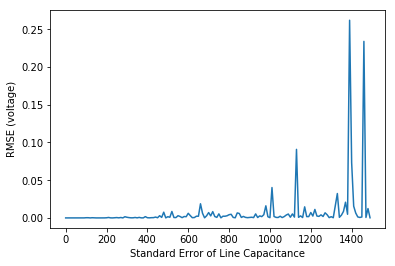

In [5]:
plt.figure()
plt.plot(numindex, rmsese)
#plt.plot(num_rm, msrm_v,color='red',linewidth=1,linestyle='--',label='After Removing Bad Data')
plt.xlabel('Standard Error of Line Capacitance')
plt.ylabel('RMSE (voltage)')

Text(0, 0.5, 'RMSE (phase angle)')

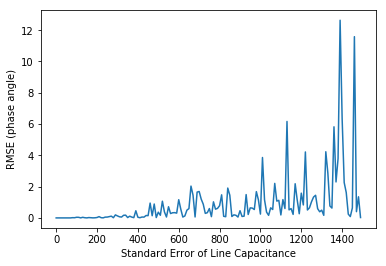

In [6]:
plt.figure()
plt.plot(numindex, rmsesea)
#plt.plot(num_rm, msrm_v,color='red',linewidth=1,linestyle='--',label='After Removing Bad Data')
plt.xlabel('Standard Error of Line Capacitance')
plt.ylabel('RMSE (phase angle)')

In [7]:
numindex = []
rmsese = []
rmsesea = []


bus_real_arr = df_bus_real.values
sigma_vm = 0.1
sigma_p = 0.1
sigma_q = 0.1
measurment_index = bus_real_arr[:,0].astype(int)
measurment_vm = bus_real_arr[:,1] + np.random.normal(0,sigma_vm,39)
measurment_p = (bus_real_arr[:,5]- bus_real_arr[:,3])+ np.random.normal(0,sigma_p,39)
measurment_q = (bus_real_arr[:,6]- bus_real_arr[:,4]) + np.random.normal(0,sigma_q,39)

for i in np.arange(0,8,0.05):
    net = pn.case39()
    pp.runpp(net)
    net.line['r_ohm_per_km'] = net.line['r_ohm_per_km']+ np.random.normal(0,i,35)
    
    net.measurement.drop(net.measurement.index, inplace=True)
    for j in range(39):
        pp.create_measurement(net, "v", "bus", measurment_vm[j], sigma_vm, measurment_index[j])
        pp.create_measurement(net, "p", "bus", measurment_p[j], sigma_p, measurment_index[j])        
        pp.create_measurement(net, "q", "bus", measurment_q[j], sigma_q, measurment_index[j]) 
      
    
    success = estimate(net,init='flat', tolerance=1e-06, maximum_iterations=100)
    
    m_index = np.array([0, 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 
                   22, 23, 24, 25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 
                   36, 37, 38,  4, 5, 6,  7,  8,  9], dtype=np.int)
    index_dict={k:m_index[k] for k in range(39)}
    df_bus_estimated = net.res_bus_est.rename(index=index_dict)
    df_bus_estimated_sorted = df_bus_estimated.sort_index()
    
    rmse=np.mean((df_bus_estimated_sorted['vm_pu']-df_bus_real['busFinalVoltage'])**2)
    rmsea=np.mean((df_bus_estimated_sorted['va_degree']-df_bus_real['busFinalDegree'])**2)
    
    numindex.append(i)
    rmsese.append(rmse)
    rmsesea.append(rmsea)

    print(i,success,rmse, rmsea)

0.0 True 4.774922359618405e-07 0.00011407665346832883
0.05 True 5.121769264262019e-07 0.0001944631092244765
0.1 True 5.390000131113224e-07 8.491440716474224e-05
0.15000000000000002 True 7.791466166229916e-07 0.00035397335609395277
0.2 True 7.57056900643863e-07 0.00018929595858002552
0.25 True 1.0503371813796512e-06 0.0009282888958361424
0.30000000000000004 True 1.1513324644411882e-06 0.0004605093517006772
0.35000000000000003 True 1.5983740613311853e-06 0.00266291719833008
0.4 True 2.2652153486371057e-06 0.0042557668129434385
0.45 True 2.27100345607925e-06 0.0015531610747862809
0.5 True 2.56425936347003e-06 0.0009031604633329599
0.55 True 5.820521689604098e-06 0.004308885582619332
0.6000000000000001 True 1.4628094302968017e-06 0.0007698840300912576
0.65 True 5.1021834603845265e-06 0.003802217401629766
0.7000000000000001 True 2.581631872805388e-06 0.0014886798946761191
0.75 True 3.6065788100958756e-06 0.002896543033058254
0.8 True 1.822825219728253e-06 0.00087099131909158
0.8500000000000

7.15 True 0.000279906382119235 0.6335119078599817
7.2 True 0.00024731262425024673 0.15193324156859303
7.25 True 0.00046754245095932516 0.3757321956668216
7.300000000000001 True 0.0003532110236636376 0.20084533726676992
7.3500000000000005 True 0.0004767856196258971 0.13006969361949117
7.4 True 0.0013226414103879626 1.1326617385348374
7.45 True 0.0007222965597301368 1.5148975650497432
7.5 True 0.00024519014536366013 0.2908234225312525
7.550000000000001 True 0.0004714638049637278 0.5271950736943761
7.6000000000000005 True 0.00023709917958790252 0.19864366753693843
7.65 True 0.0008965533797141217 0.6245036965556202
7.7 True 0.0002480575346002766 0.3188311152697085
7.75 True 0.0013736180796358373 1.6192799921469339
7.800000000000001 True 0.0006040508583800841 1.2596642527201127
7.8500000000000005 True 0.0006888121322197011 0.4706500580222192
7.9 True 0.000498016179896708 0.38219312001673494
7.95 True 0.000489209807461928 1.3062343294416006


Text(0, 0.5, 'RMSE (voltage)')

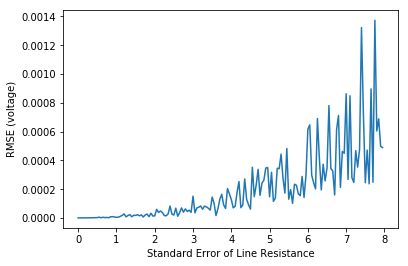

In [8]:
plt.figure()
plt.plot(numindex, rmsese)
#plt.plot(num_rm, msrm_v,color='red',linewidth=1,linestyle='--',label='After Removing Bad Data')
plt.xlabel('Standard Error of Line Resistance')
plt.ylabel('RMSE (voltage)')

Text(0, 0.5, 'RMSE (phase angle)')

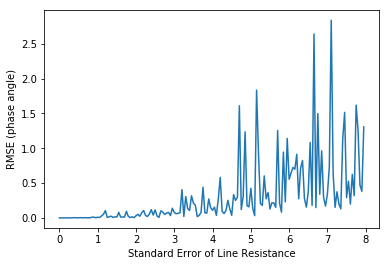

In [9]:
plt.figure()
plt.plot(numindex, rmsesea)
#plt.plot(num_rm, msrm_v,color='red',linewidth=1,linestyle='--',label='After Removing Bad Data')
plt.xlabel('Standard Error of Line Resistance')
plt.ylabel('RMSE (phase angle)')

In [10]:
numindex = []
rmsese = []
rmsesea = []


bus_real_arr = df_bus_real.values
sigma_vm = 0.1
sigma_p = 0.1
sigma_q = 0.1
measurment_index = bus_real_arr[:,0].astype(int)
measurment_vm = bus_real_arr[:,1] + np.random.normal(0,sigma_vm,39)
measurment_p = (bus_real_arr[:,5]- bus_real_arr[:,3])+ np.random.normal(0,sigma_p,39)
measurment_q = (bus_real_arr[:,6]- bus_real_arr[:,4]) + np.random.normal(0,sigma_q,39)

for i in np.arange(0,75,1):
    net = pn.case39()
    pp.runpp(net)
    net.line['x_ohm_per_km'] = net.line['x_ohm_per_km']+ np.random.normal(0,i,35)
    
    net.measurement.drop(net.measurement.index, inplace=True)
    for j in range(39):
        pp.create_measurement(net, "v", "bus", measurment_vm[j], sigma_vm, measurment_index[j])
        pp.create_measurement(net, "p", "bus", measurment_p[j], sigma_p, measurment_index[j])        
        pp.create_measurement(net, "q", "bus", measurment_q[j], sigma_q, measurment_index[j]) 
      
    
    success = estimate(net,init='flat', tolerance=1e-06, maximum_iterations=100)
    
    m_index = np.array([0, 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 
                   22, 23, 24, 25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 
                   36, 37, 38,  4, 5, 6,  7,  8,  9], dtype=np.int)
    index_dict={k:m_index[k] for k in range(39)}
    df_bus_estimated = net.res_bus_est.rename(index=index_dict)
    df_bus_estimated_sorted = df_bus_estimated.sort_index()
    
    rmse=np.mean((df_bus_estimated_sorted['vm_pu']-df_bus_real['busFinalVoltage'])**2)
    rmsea=np.mean((df_bus_estimated_sorted['va_degree']-df_bus_real['busFinalDegree'])**2)
    
    numindex.append(i)
    rmsese.append(rmse)
    rmsesea.append(rmsea)

    print(i,success,rmse, rmsea)

0 True 2.3800165891632466e-07 0.00013281707858733342
1 True 6.2851211018252485e-06 0.1879955409360552
2 True 1.7906138491441836e-05 0.46274660134127643
3 True 8.529533502153536e-05 0.45313135653693265
4 True 2.8015940473995724e-05 0.8351502097069398
5 True 1.0749508053851529e-05 2.3277753954322336
6 True 3.3012037142355945e-05 1.1523874317246214
7 True 5.395012245763053e-05 1.557494154944602
8 True 5.029582877977597e-05 4.2208038373415535
9 True 0.00041871079246329175 14.273350690010515
10 True 4.44010554812418e-05 3.359018030725901
11 True 0.0003965122427642895 3.5020716433123447
12 True 7.5483306606444e-05 3.7378755686816985
13 True 0.0003880912037806291 5.3283268546487506
14 True 0.0024086735279951078 12.197183173772071
15 True 0.00045037267499078965 8.461968424082503
16 True 0.0017960939294941326 13.697325203785436
17 True 0.0005606058224704153 10.41623560905435
18 True 0.002919459791375473 43.308850687247066
19 True 0.0009705967978693739 35.22994194580089
20 True 0.002899849065545

Text(0, 0.5, 'RMSE (voltage)')

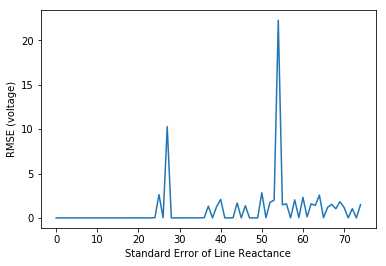

In [11]:
plt.figure()
plt.plot(numindex, rmsese)
#plt.plot(num_rm, msrm_v,color='red',linewidth=1,linestyle='--',label='After Removing Bad Data')
plt.xlabel('Standard Error of Line Reactance')
plt.ylabel('RMSE (voltage)')

Text(0, 0.5, 'RMSE (phase angle)')

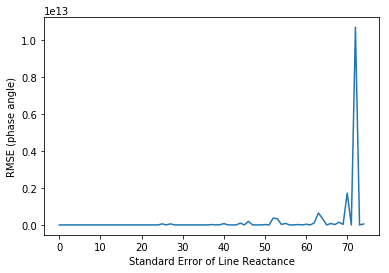

In [12]:
plt.figure()
plt.plot(numindex, rmsesea)
#plt.plot(num_rm, msrm_v,color='red',linewidth=1,linestyle='--',label='After Removing Bad Data')
plt.xlabel('Standard Error of Line Reactance')
plt.ylabel('RMSE (phase angle)')

In [13]:
df_bus_real

,busnnumber,busFinalVoltage,busFinalDegree,busLoadMW,busLoadMVAR,busGenerationMW,busGenerationMVAR
0,0,1.047356,-8.438685,0.000000,0.000000,0.000000,0.000000
1,1,1.048736,-5.753762,0.000000,0.000000,0.000000,0.000000
2,2,1.030173,-8.598549,322.000000,2.400000,0.000000,0.000000
3,3,1.003863,-9.606667,500.000000,184.000000,0.000000,0.000000
4,4,1.005311,-8.611863,0.000000,0.000000,0.000000,0.000000
5,5,1.007672,-7.949683,0.000000,0.000000,0.000000,0.000000
6,6,0.997001,-10.123823,233.800003,84.000000,0.000000,0.000000
7,7,0.996020,-10.615381,522.000000,176.000000,0.000000,0.000000
8,8,1.028226,-10.321987,0.000000,0.000000,0.000000,0.000000
9,9,1.017151,-5.427126,0.000000,0.000000,0.000000,0.000000


In [14]:
df_bus_estimated_sorted

,vm_pu,va_degree,p_mw,q_mvar
0,-0.117257,-4671.412719,-718.766711,-765.971939
1,-0.054702,33793.185912,129.130572,-40.554365
2,-0.055172,-42909.545953,114.687191,26.016095
3,-0.934086,-6817.927304,103.240407,-4672.643552
4,0.123435,5728.449066,-571.792117,-34.929698
5,1.001531,6223.096535,2201.139440,683.285585
6,-0.064188,-5043.247483,85.790568,104.961761
7,0.233638,-10826.627386,-13.978906,348.097824
8,0.747545,-19987.949564,355.097169,-1826.978557
9,-0.432444,-95785.380314,509.540978,-884.374896


## Load the pandapower built-in case 39 and run the powerflow computation

In [15]:
net = pn.case39()
pp.runpp(net)
net

This pandapower network includes the following parameter tables:
   - bus (39 elements)
   - load (21 elements)
   - gen (9 elements)
   - ext_grid (1 element)
   - line (35 elements)
   - trafo (11 elements)
   - poly_cost (10 elements)
   - bus_geodata (39 elements)
 and the following results tables:
   - res_bus (39 elements)
   - res_line (35 elements)
   - res_trafo (11 elements)
   - res_ext_grid (1 element)
   - res_load (21 elements)
   - res_gen (9 elements)

In [16]:
net.line['x_ohm_per_km'].max(), net.line['x_ohm_per_km'].min()

(74.390625, 3.09465)

In [17]:
net.line

,c_nf_per_km,df,from_bus,g_us_per_km,in_service,length_km,max_i_ka,max_loading_percent,name,parallel,r_ohm_per_km,std_type,to_bus,type,x_ohm_per_km
0,1557.117675,1.0,0,0.0,True,1.0,1.004087,100.0,None,1,4.165875,None,1,ol,48.919275
1,1671.444477,1.0,0,0.0,True,1.0,1.673479,100.0,None,1,1.190250,None,38,ol,29.756250
10,251.830968,1.0,5,0.0,True,1.0,1.506131,100.0,None,1,0.714150,None,6,ol,10.950300
11,309.551517,1.0,5,0.0,True,1.0,0.803270,100.0,None,1,0.833175,None,10,ol,9.760050
12,173.830226,1.0,6,0.0,True,1.0,1.506131,100.0,None,1,0.476100,None,7,ol,5.475150
13,847.756639,1.0,7,0.0,True,1.0,1.506131,100.0,None,1,2.737575,None,8,ol,43.206075
14,2674.311163,1.0,8,0.0,True,1.0,1.506131,100.0,None,1,1.190250,None,38,ol,29.756250
15,162.464403,1.0,9,0.0,True,1.0,1.004087,100.0,None,1,0.476100,None,10,ol,5.118075
16,162.464403,1.0,9,0.0,True,1.0,1.004087,100.0,None,1,0.476100,None,12,ol,5.118075
17,383.986511,1.0,12,0.0,True,1.0,1.004087,100.0,None,1,1.071225,None,13,ol,12.021525


## Load the bus data from the Excel sheet

In [18]:
df_bus = pd.read_excel('39busbar-data-second-try.xlsx', sheet_name='BusEntry_normal')
df_bus['busnnumber'] = df_bus['busnnumber']-1
df_bus_real = df_bus[['busnnumber', 'busFinalVoltage', 'busFinalDegree', 'busLoadMW', 'busLoadMVAR', 'busGenerationMW', 'busGenerationMVAR']]

## Bus data

In [19]:
df_bus_real

,busnnumber,busFinalVoltage,busFinalDegree,busLoadMW,busLoadMVAR,busGenerationMW,busGenerationMVAR
0,0,1.047356,-8.438685,0.000000,0.000000,0.000000,0.000000
1,1,1.048736,-5.753762,0.000000,0.000000,0.000000,0.000000
2,2,1.030173,-8.598549,322.000000,2.400000,0.000000,0.000000
3,3,1.003863,-9.606667,500.000000,184.000000,0.000000,0.000000
4,4,1.005311,-8.611863,0.000000,0.000000,0.000000,0.000000
5,5,1.007672,-7.949683,0.000000,0.000000,0.000000,0.000000
6,6,0.997001,-10.123823,233.800003,84.000000,0.000000,0.000000
7,7,0.996020,-10.615381,522.000000,176.000000,0.000000,0.000000
8,8,1.028226,-10.321987,0.000000,0.000000,0.000000,0.000000
9,9,1.017151,-5.427126,0.000000,0.000000,0.000000,0.000000


In [20]:
net._ppc["bus"]=0

In [21]:
net._ppc["gen"]=0

In [22]:
net._ppc

{'baseMVA': 1.0,
 'version': 2,
 'bus': 0,
 'branch': array([[0.0e+00+0.j, 1.0e+00+0.j, 3.5e-05+0.j, ..., 0.0e+00+0.j,
         0.0e+00+0.j, 0.0e+00+0.j],
        [0.0e+00+0.j, 3.2e+01+0.j, 1.0e-05+0.j, ..., 0.0e+00+0.j,
         0.0e+00+0.j, 0.0e+00+0.j],
        [3.4e+01+0.j, 3.5e+01+0.j, 6.0e-06+0.j, ..., 0.0e+00+0.j,
         0.0e+00+0.j, 0.0e+00+0.j],
        ...,
        [1.1e+01+0.j, 2.7e+01+0.j, 9.0e-06+0.j, ..., 0.0e+00+0.j,
         0.0e+00+0.j, 0.0e+00+0.j],
        [1.4e+01+0.j, 2.8e+01+0.j, 0.0e+00+0.j, ..., 0.0e+00+0.j,
         0.0e+00+0.j, 0.0e+00+0.j],
        [1.7e+01+0.j, 3.0e+01+0.j, 6.0e-06+0.j, ..., 0.0e+00+0.j,
         0.0e+00+0.j, 0.0e+00+0.j]]),
 'gen': 0,
 'internal': {'Ybus': <39x39 sparse matrix of type '<class 'numpy.complex128'>'
  	with 131 stored elements in Compressed Sparse Row format>,
  'Yf': <46x39 sparse matrix of type '<class 'numpy.complex128'>'
  	with 92 stored elements in Compressed Sparse Row format>,
  'Yt': <46x39 sparse matrix of type '<c

In [23]:
bus_real_arr = df_bus_real.values
sigma_vm = 0.1
sigma_p = 0.1
sigma_q = 0.1
measurment_index = bus_real_arr[:,0].astype(int)
measurment_vm = bus_real_arr[:,1] + np.random.normal(0,sigma_vm,39)
measurment_p = (bus_real_arr[:,5]- bus_real_arr[:,3])+ np.random.normal(0,sigma_p,39)
measurment_q = (bus_real_arr[:,6]- bus_real_arr[:,4]) + np.random.normal(0,sigma_q,39)

num_rm = []
msr_v = []
msrm_v = []
rmse_v = []
rmser_v = []
suc = []

for i in range(0,1):
    net.measurement.drop(net.measurement.index, inplace=True)
    for j in range(39):
        pp.create_measurement(net, "v", "bus", measurment_vm[j], sigma_vm, measurment_index[j])
        pp.create_measurement(net, "p", "bus", measurment_p[j], sigma_p, measurment_index[j])        
        pp.create_measurement(net, "q", "bus", measurment_q[j], sigma_q, measurment_index[j]) 
      
    #print(net._ppc)
    success = estimate(net,init='flat', tolerance=1e-06, maximum_iterations=100)
    #print(net._ppc)
    print(success)
    m_index = np.array([0, 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 
                   22, 23, 24, 25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 
                   36, 37, 38,  4, 5, 6,  7,  8,  9], dtype=np.int)
    index_dict={k:m_index[k] for k in range(39)}
    df_bus_estimated = net.res_bus_est.rename(index=index_dict)
    df_bus_estimated_sorted = df_bus_estimated.sort_index()
    
    #msr_v.append(np.mean(((df_bus_estimated_sorted['vm_pu']- measurment_vm)/0.1)**2))
    #rmse_v.append(np.mean((df_bus_estimated_sorted['vm_pu']-df_bus_real['busFinalVoltage'])**2))
    #print(df_bus_estimated_sorted)

True


In [24]:
df_bus_estimated_sorted

,vm_pu,va_degree,p_mw,q_mvar
0,1.046858,-8.451934,0.048849,0.080226
1,1.048402,-5.766864,-0.087376,-0.165716
2,1.029752,-8.614127,322.025448,2.448875
3,1.003335,-9.621229,499.896336,183.961886
4,1.004746,-8.624091,-0.059884,0.039139
5,1.007102,-7.961079,0.035486,-0.140655
6,0.996430,-10.137506,233.802560,84.016694
7,0.995452,-10.629531,521.934471,175.703645
8,1.027620,-10.334912,-0.082485,0.215712
9,1.016575,-5.436426,0.028594,0.011442


## Bad Data

In [30]:
bus_real_arr = df_bus_real.values
sigma_vm = 0.1
sigma_p = 0.1
sigma_q = 0.1
measurment_index = bus_real_arr[:,0].astype(int)
measurment_vm = bus_real_arr[:,1] + np.random.normal(0,sigma_vm,39)
measurment_p = (bus_real_arr[:,5]- bus_real_arr[:,3])+ np.random.normal(0,sigma_p,39)
measurment_q = (bus_real_arr[:,6]- bus_real_arr[:,4]) + np.random.normal(0,sigma_q,39)

num_rm = []
msr_v = []
msrm_v = []
rmse_v = []
rmser_v = []
suc = []

for i in range(0,38,1):
    measurment_vm[0:i]=10
    net.measurement.drop(net.measurement.index, inplace=True)
    for j in range(39):
        pp.create_measurement(net, "v", "bus", measurment_vm[j], sigma_vm, measurment_index[j])
        pp.create_measurement(net, "p", "bus", measurment_p[j], sigma_p, measurment_index[j])        
        pp.create_measurement(net, "q", "bus", measurment_q[j], sigma_q, measurment_index[j]) 
        
    success = estimate(net,init='flat', tolerance=1e-06, maximum_iterations=100)
    m_index = np.array([0, 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 
                   22, 23, 24, 25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 
                   36, 37, 38,  4, 5, 6,  7,  8,  9], dtype=np.int)
    index_dict={k:m_index[k] for k in range(39)}
    df_bus_estimated = net.res_bus_est.rename(index=index_dict)
    df_bus_estimated_sorted = df_bus_estimated.sort_index()
    num_rm.append(i)
    msr_v.append(np.mean(((df_bus_estimated_sorted['vm_pu']- measurment_vm)/0.1)**2))
    rmse_v.append(np.mean((df_bus_estimated_sorted['vm_pu']-df_bus_real['busFinalVoltage'])**2))
    
     
    success = remove_bad_data(net, init='flat', tolerance=1e-06, maximum_iterations=100,rn_max_threshold=50.0) 
    suc.append(success)
    
    success = estimate(net,init='flat', tolerance=1e-06, maximum_iterations=100)
    m_index = np.array([0, 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 
                   22, 23, 24, 25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 
                   36, 37, 38,  4, 5, 6,  7,  8,  9], dtype=np.int)
    index_dict={k:m_index[k] for k in range(39)}
    df_bus_estimated = net.res_bus_est.rename(index=index_dict)
    df_bus_estimated_sorted = df_bus_estimated.sort_index()
    
    msrm_v.append(np.mean(((df_bus_estimated_sorted['vm_pu'][i:]- measurment_vm[i:])/0.1)**2))
    rmser_v.append(np.mean((df_bus_estimated_sorted['vm_pu']-df_bus_real['busFinalVoltage'])**2))
    
    print(num_rm[i], suc[i], msr_v[i],msrm_v[i], rmse_v[i], rmser_v[i])

0 True 0.8234029926822742 0.8234029926822742 3.4497396903768513e-07 3.4497396903768513e-07
1 True 206.3563243886213 0.8424166367903382 3.2026150712062707e-07 3.450638064443886e-07
2 True 411.7500073325521 0.7905118984509087 2.977073199201571e-07 3.4551863230699545e-07
3 True 617.9320997385911 0.6625945002565345 2.751019599983266e-07 3.4488364056889266e-07
4 True 825.4676613873277 0.6791725593487662 2.5379659478916407e-07 3.4480488060008985e-07
5 True 1032.8938112125484 0.6478565265222658 2.3391812427386927e-07 3.4516536200998326e-07
6 True 1240.2534516826133 0.6673455845622773 2.1477173514435218e-07 3.4518405430394715e-07
7 True 1448.0942744578658 0.6770505034601044 1.961873568746575e-07 3.450193804908814e-07
8 True 1655.971607023176 0.6790608208096222 1.78772684980093e-07 3.452366027960181e-07
9 False 1862.3648026090318 127.52162530394747 1.6181277629058868e-07 10.601252832483334
10 False 2069.2788874951807 403.9779846368965 1.4680544391541923e-07 12.3902957677836
11 False 2276.384465

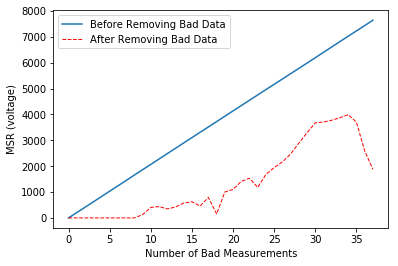

In [31]:
plt.figure()
plt.plot(num_rm, msr_v,label='Before Removing Bad Data' )
plt.plot(num_rm, msrm_v,color='red',linewidth=1,linestyle='--',label='After Removing Bad Data')
plt.xlabel('Number of Bad Measurements')
plt.ylabel('MSR (voltage)')
plt.legend()

Text(0, 0.5, 'RMSE (voltage)')

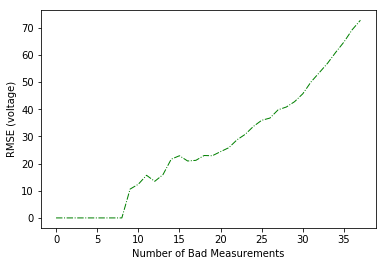

In [32]:
plt.figure()
plt.plot(num_rm, rmser_v,color='green',linewidth=1,linestyle='-.')
plt.xlabel('Number of Bad Measurements')
plt.ylabel('RMSE (voltage)')

In [ ]:
bus_real_arr = df_bus_real.values
sigma_vm = 0.1
sigma_p = 0.1
sigma_q = 0.1
measurment_index = bus_real_arr[:,0].astype(int)
measurment_vm = bus_real_arr[:,1] + np.random.normal(0,sigma_vm,39)
measurment_p = (bus_real_arr[:,5]- bus_real_arr[:,3])+ np.random.normal(0,sigma_p,39)
measurment_q = (bus_real_arr[:,6]- bus_real_arr[:,4]) + np.random.normal(0,sigma_q,39)
#measurment_vm[0:2]=10

In [ ]:
net.measurement.drop(net.measurement.index, inplace=True)
for i in range(39):
    pp.create_measurement(net, "v", "bus", measurment_vm[i], sigma_vm, measurment_index[i])
    pp.create_measurement(net, "p", "bus", measurment_p[i], sigma_p, measurment_index[i])        
    pp.create_measurement(net, "q", "bus", measurment_q[i], sigma_q, measurment_index[i]) 
net.measurement

In [ ]:
success = estimate(net,init='flat', tolerance=1e-06, maximum_iterations=100)
    
m_index = np.array([0, 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 
                   22, 23, 24, 25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 
                   36, 37, 38,  4, 5, 6,  7,  8,  9], dtype=np.int)
index_dict={k:m_index[k] for k in range(39)}
df_bus_estimated = net.res_bus_est.rename(index=index_dict)
df_bus_estimated_sorted = df_bus_estimated.sort_index()
    

In [ ]:
df_bus_estimated_sorted

In [ ]:
rmse_v = np.mean((df_bus_estimated_sorted['vm_pu']-df_bus_real['busFinalVoltage'])**2)
msr_p = np.mean(((df_bus_estimated_sorted['vm_pu']- measurment_vm)/0.1)**2)

In [ ]:
rmse_v,msr_p

In [ ]:
success = chi2_analysis(net, init='flat', tolerance=1e-06, maximum_iterations=100) 
print(success)

In [ ]:
success = remove_bad_data(net, init='flat', tolerance=1e-06, maximum_iterations=100,rn_max_threshold=50.0) 
print(success)

In [ ]:
net.measurement

In [ ]:
m_index = np.array([0, 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 
                   22, 23, 24, 25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 
                   36, 37, 38,  4, 5, 6,  7,  8,  9], dtype=np.int)
index_dict={k:m_index[k] for k in range(39)}
df_bus_estimated = net.res_bus_est.rename(index=index_dict)
df_bus_estimated_sorted = df_bus_estimated.sort_index()

In [ ]:
df_bus_estimated_sorted

In [ ]:
rmse_v = np.mean((df_bus_estimated_sorted['vm_pu']-df_bus_real['busFinalVoltage'])**2)
msr_p = np.mean(((df_bus_estimated_sorted['vm_pu'][2:]- measurment_vm[2:])/0.1)**2)

In [ ]:
rmse_v,msr_p

In [ ]:
df_bus_estimated_sorted['vm_pu']

In [ ]:
measurment_vm

In [ ]:
measurment_p

## Standard Error

In [33]:
bus_real_arr = df_bus_real.values
noise_level = []
rmse_v = []
rmse_theta = []
msr_p = []
msr_q = []

for i in tqdm(np.arange(0.01,30,0.5)):
    sigma_vm = i
    sigma_p = i
    sigma_q = i
    
    noise_level.append(i)
    
    measurment_index = bus_real_arr[:,0].astype(int)
    measurment_vm = bus_real_arr[:,1] + np.random.normal(0,sigma_vm,39)
    measurment_p = (bus_real_arr[:,5]- bus_real_arr[:,3])+ np.random.normal(0,sigma_p,39)
    measurment_q = (bus_real_arr[:,6]- bus_real_arr[:,4]) + np.random.normal(0,sigma_q,39)
    
    for i in range(39):
        pp.create_measurement(net, "v", "bus", measurment_vm[i], sigma_vm, measurment_index[i])
        pp.create_measurement(net, "p", "bus", measurment_p[i], sigma_p, measurment_index[i])        
        pp.create_measurement(net, "q", "bus", measurment_q[i], sigma_q, measurment_index[i]) 
    
    success = estimate(net,init='flat', tolerance=1e-06, maximum_iterations=100)
    
    m_index = np.array([0, 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 
                   22, 23, 24, 25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 
                   36, 37, 38,  4, 5, 6,  7,  8,  9], dtype=np.int)
    index_dict={k:m_index[k] for k in range(39)}
    df_bus_estimated = net.res_bus_est.rename(index=index_dict)
    df_bus_estimated_sorted = df_bus_estimated.sort_index()
    
    
    rmse_v.append(np.mean((df_bus_estimated_sorted['vm_pu']-df_bus_real['busFinalVoltage'])**2))
    rmse_theta.append(np.mean((df_bus_estimated_sorted['va_degree']-df_bus_real['busFinalDegree'])**2))
    
    msr_p.append(np.mean(((df_bus_estimated_sorted['p_mw']+ measurment_p)/i)**2))
    msr_q.append(np.mean(((df_bus_estimated_sorted['q_mvar']+ measurment_q)/i)**2))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60/60 [00:55<00:00,  1.10it/s]


In [34]:
measurment_vm

array([ 3.61811309e+00,  3.97195734e+01,  2.31312516e+01, -5.65455965e+00,
       -7.46575212e+00,  1.80482723e+01, -1.13952667e+01, -3.01914415e+01,
        1.96116096e+00,  2.21090456e+01, -4.49523994e+01, -1.90372475e+01,
       -6.74128510e+00,  4.87384221e+01, -3.99728082e+01,  6.06616060e+01,
        1.93926143e+01, -1.65652231e+01,  3.82371912e+01, -2.70141472e+00,
        2.77892091e+01,  5.50576759e+01,  4.66925084e+01, -2.06659052e+01,
        4.01220013e+01, -3.45669742e+01,  2.13296385e+01, -2.72840916e+01,
        6.59932907e+01,  5.87010210e+01,  1.37092409e+00, -5.64160670e+00,
        1.76788237e+01, -4.07674281e+00, -2.91880310e+01,  1.67646047e+01,
       -2.88601547e-03, -3.89914123e+00, -1.87636023e+01])

In [35]:
res=zip(np.arange(0.01,30,0.5), rmse_v,rmse_theta,msr_p,msr_q)

In [36]:
df_res = pd.DataFrame(res,columns = ['standarderror', 'rmsev','rmse_theta','msr_p','msr_q'])
df_res

,standarderror,rmsev,rmse_theta,msr_p,msr_q
0,0.01,2.758350e-07,0.000069,4.075727e-09,5.419489e-12
1,0.51,2.805782e-07,0.000202,1.470090e-06,2.708193e-09
2,1.01,5.463657e-07,0.000830,2.219023e-05,5.899648e-10
3,1.51,3.443534e-07,0.001237,9.925358e-06,1.051972e-08
4,2.01,7.368742e-06,0.001627,1.147353e-06,1.229400e-09
5,2.51,1.490989e-05,0.010994,2.893455e-05,3.599231e-08
6,3.01,2.555425e-04,0.050026,1.792642e-06,3.853050e-09
7,3.51,1.137184e-04,0.035610,2.901111e-05,1.104671e-07
8,4.01,6.011345e-06,0.018994,7.201788e-05,4.553684e-08
9,4.51,8.025962e-06,0.039411,6.972853e-04,4.771341e-07


Text(0, 0.5, 'RMSE (voltage)')

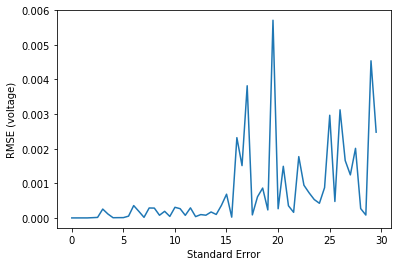

In [37]:
plt.plot(noise_level,rmse_v)
plt.xlabel('Standard Error')
plt.ylabel('RMSE (voltage)')

Text(0, 0.5, 'RMSE (degree)')

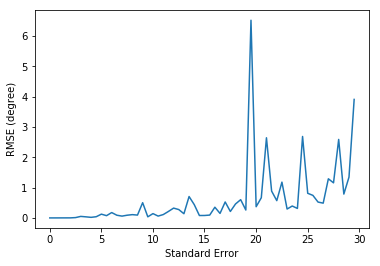

In [38]:
plt.plot(noise_level,rmse_theta)
plt.xlabel('Standard Error')
plt.ylabel('RMSE (degree)')

Text(0, 0.5, 'MSR (Real Power)')

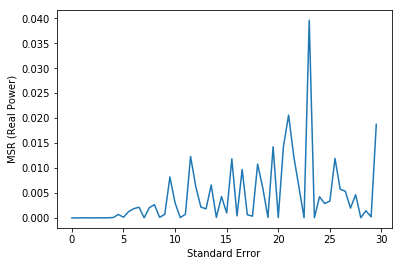

In [39]:
plt.plot(noise_level,msr_p)
plt.xlabel('Standard Error')
plt.ylabel('MSR (Real Power)')

Text(0, 0.5, 'MSR (Reactive Power)')

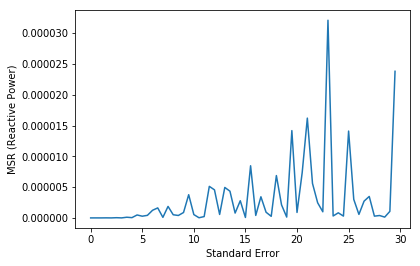

In [40]:
plt.plot(noise_level,msr_q)
plt.xlabel('Standard Error')
plt.ylabel('MSR (Reactive Power)')

In [41]:
for i in range(39):
    pp.create_measurement(net, "v", "bus", measurment_vm[i], sigma_vm, measurment_index[i])
    pp.create_measurement(net, "p", "bus", measurment_p[i], sigma_p, measurment_index[i])        
    pp.create_measurement(net, "q", "bus", measurment_q[i], sigma_q, measurment_index[i]) 
net.measurement

,name,measurement_type,element_type,element,value,std_dev,side
1,None,p,bus,0,-14.879719,29.51,None
2,None,q,bus,0,-0.600139,29.51,None
4,None,p,bus,1,-11.154328,29.51,None
5,None,q,bus,1,2.538416,29.51,None
6,None,v,bus,2,23.131252,29.51,None
7,None,p,bus,2,-320.400954,29.51,None
8,None,q,bus,2,33.650635,29.51,None
9,None,v,bus,3,-5.654560,29.51,None
10,None,p,bus,3,-539.821885,29.51,None
11,None,q,bus,3,-173.679634,29.51,None


## Number of Measurments

In [42]:
bus_real_arr = df_bus_real.values
num_of_meas = []
rmse_v = []
rmse_theta = []
msr_p = []
msr_q = []

sigma_vm = 0.1
sigma_p = 0.1
sigma_q = 0.1

    
measurment_index = bus_real_arr[:,0].astype(int)
measurment_vm = bus_real_arr[:,1] + np.random.normal(0,sigma_vm,39)
measurment_p = (bus_real_arr[:,5]- bus_real_arr[:,3])+ np.random.normal(0,sigma_p,39)
measurment_q = (bus_real_arr[:,6]- bus_real_arr[:,4]) + np.random.normal(0,sigma_q,39)
    
measurment_index = bus_real_arr[:,0].astype(int)
measurment_vm = bus_real_arr[:,1] + np.random.normal(0,sigma_vm,39)
measurment_p = (bus_real_arr[:,5]- bus_real_arr[:,3])+ np.random.normal(0,sigma_p,39)
measurment_q = (bus_real_arr[:,6]- bus_real_arr[:,4]) + np.random.normal(0,sigma_q,39)


for i in np.arange(0.7,1,0.01):
    
    net.measurement.drop(net.measurement.index, inplace=True)
   

    for j in range(39): 
        pp.create_measurement(net, "v", "bus", measurment_vm[j], sigma_vm, measurment_index[j])
        pp.create_measurement(net, "p", "bus", measurment_p[j], sigma_p, measurment_index[j])
        pp.create_measurement(net, "q", "bus", measurment_q[j], sigma_q, measurment_index[j]) 
        
    net.measurement = net.measurement.sample(frac=i)
        
    success = estimate(net,init='flat', tolerance=1e-06, maximum_iterations=100)
        
        
    print(i,len(net.measurement),success)
    
    m_index = np.array([0, 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 
                   22, 23, 24, 25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 
                   36, 37, 38,  4, 5, 6,  7,  8,  9], dtype=np.int)
    index_dict={k:m_index[k] for k in range(39)}
    df_bus_estimated = net.res_bus_est.rename(index=index_dict)
    df_bus_estimated_sorted = df_bus_estimated.sort_index()
    
    
    num_of_meas.append(len(net.measurement))
    rmse_v.append(np.mean((df_bus_estimated_sorted['vm_pu']-df_bus_real['busFinalVoltage'])**2))
    rmse_theta.append(np.mean((df_bus_estimated_sorted['va_degree']-df_bus_real['busFinalDegree'])**2))
    
    msr_p.append(np.mean(((df_bus_estimated_sorted['p_mw']+ measurment_p)/0.1)**2))
    msr_q.append(np.mean(((df_bus_estimated_sorted['q_mvar']+ measurment_q)/0.1)**2))
    
    
        

C:\Users\sweet\Anaconda3\lib\site-packages\pandapower\estimation\estimator\wls_matrix_ops.py:95: RuntimeWarning: overflow encountered in square
  self.i_ij = np.divide(np.sqrt(np.float64(s_ij.real ** 2 + s_ij.imag ** 2)).T, v).T
C:\Users\sweet\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:193: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", MatrixRankWarning)


0.7 82 False


C:\Users\sweet\Anaconda3\lib\site-packages\pandapower\estimation\estimator\wls_matrix_ops.py:95: RuntimeWarning: overflow encountered in square
  self.i_ij = np.divide(np.sqrt(np.float64(s_ij.real ** 2 + s_ij.imag ** 2)).T, v).T
C:\Users\sweet\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:193: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", MatrixRankWarning)


0.71 83 False


C:\Users\sweet\Anaconda3\lib\site-packages\pandapower\estimation\estimator\wls_matrix_ops.py:95: RuntimeWarning: overflow encountered in square
  self.i_ij = np.divide(np.sqrt(np.float64(s_ij.real ** 2 + s_ij.imag ** 2)).T, v).T
C:\Users\sweet\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:193: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", MatrixRankWarning)


0.72 84 False


C:\Users\sweet\Anaconda3\lib\site-packages\pandapower\estimation\estimator\wls_matrix_ops.py:95: RuntimeWarning: overflow encountered in square
  self.i_ij = np.divide(np.sqrt(np.float64(s_ij.real ** 2 + s_ij.imag ** 2)).T, v).T
C:\Users\sweet\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:193: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", MatrixRankWarning)


0.73 85 False


C:\Users\sweet\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:193: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", MatrixRankWarning)


0.74 87 False


C:\Users\sweet\Anaconda3\lib\site-packages\pandapower\estimation\estimator\wls_matrix_ops.py:95: RuntimeWarning: overflow encountered in square
  self.i_ij = np.divide(np.sqrt(np.float64(s_ij.real ** 2 + s_ij.imag ** 2)).T, v).T
C:\Users\sweet\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:193: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", MatrixRankWarning)


0.75 88 False
0.76 89 False
0.77 90 False
0.78 91 False
0.79 92 False
0.8 94 False


C:\Users\sweet\Anaconda3\lib\site-packages\pandapower\estimation\estimator\wls_matrix_ops.py:95: RuntimeWarning: overflow encountered in square
  self.i_ij = np.divide(np.sqrt(np.float64(s_ij.real ** 2 + s_ij.imag ** 2)).T, v).T
C:\Users\sweet\Anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:193: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", MatrixRankWarning)


0.81 95 False
0.8200000000000001 96 False
0.8300000000000001 97 False
0.8400000000000001 98 False
0.8500000000000001 99 False
0.8600000000000001 101 False
0.8700000000000001 102 False
0.8800000000000001 103 False
0.8900000000000001 104 False
0.9000000000000001 105 False
0.9100000000000001 106 False
0.9200000000000002 108 False
0.9300000000000002 109 True
0.9400000000000002 110 True
0.9500000000000002 111 True
0.9600000000000002 112 True
0.9700000000000002 113 True
0.9800000000000002 115 True
0.9900000000000002 116 True
1.0000000000000002 117 True


In [43]:
num_of_meass=[]
rmse_vv=[]
rmse_thetaa=[]    
msr_pp=[]
msr_qq=[]

for i in range(len(rmse_v)):
    if rmse_v[i]==rmse_v[i]:
        num_of_meass.append(num_of_meas[i])
        rmse_vv.append(rmse_v[i])
        rmse_thetaa.append(rmse_theta[i])    
        msr_pp.append(msr_p[i])
        msr_qq.append(msr_q[i])

Text(0, 0.5, 'RMSE (voltage)')

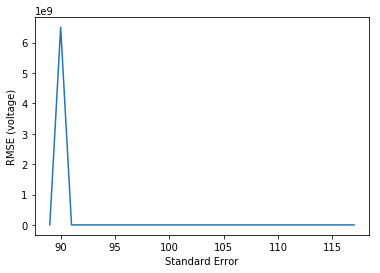

In [44]:
plt.plot(num_of_meass,rmse_vv)
plt.xlabel('Standard Error')
plt.ylabel('RMSE (voltage)')

Text(0, 0.5, 'RMSE (degree)')

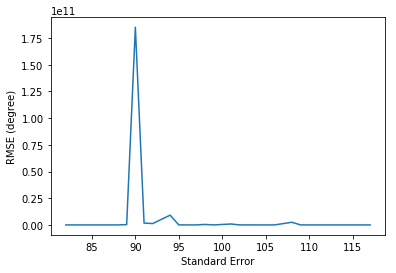

In [45]:
plt.plot(num_of_meas,rmse_theta)
plt.xlabel('Standard Error')
plt.ylabel('RMSE (degree)')

## The following is to show at least 78 measurments are required, otherwise SE will crash

In [46]:
bus_real_arr = df_bus_real.values
num_of_meas = []
rmse_v = []
rmse_theta = []
msr_p = []
msr_q = []

sigma_vm = 0.1
sigma_p = 0.1
sigma_q = 0.1

    
measurment_index = bus_real_arr[:,0].astype(int)
measurment_vm = bus_real_arr[:,1] + np.random.normal(0,sigma_vm,39)
measurment_p = (bus_real_arr[:,5]- bus_real_arr[:,3])+ np.random.normal(0,sigma_p,39)
measurment_q = (bus_real_arr[:,6]- bus_real_arr[:,4]) + np.random.normal(0,sigma_q,39)
    
measurment_index = bus_real_arr[:,0].astype(int)
measurment_vm = bus_real_arr[:,1] + np.random.normal(0,sigma_vm,39)
measurment_p = (bus_real_arr[:,5]- bus_real_arr[:,3])+ np.random.normal(0,sigma_p,39)
measurment_q = (bus_real_arr[:,6]- bus_real_arr[:,4]) + np.random.normal(0,sigma_q,39)


for i in np.arange(0.7,1,0.01):
    
    net.measurement.drop(net.measurement.index, inplace=True)
   

    for j in range(39): 
        pp.create_measurement(net, "v", "bus", measurment_vm[j], sigma_vm, measurment_index[j])
        pp.create_measurement(net, "p", "bus", measurment_p[j], sigma_p, measurment_index[j])
        pp.create_measurement(net, "q", "bus", measurment_q[j], sigma_q, measurment_index[j]) 
        
    net.measurement = net.measurement.sample(frac=0.1)
        
    success = estimate(net,init='flat', tolerance=1e-06, maximum_iterations=100)
        
        
    print(i,len(net.measurement),success)
    
    m_index = np.array([0, 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 
                   22, 23, 24, 25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 
                   36, 37, 38,  4, 5, 6,  7,  8,  9], dtype=np.int)
    index_dict={k:m_index[k] for k in range(39)}
    df_bus_estimated = net.res_bus_est.rename(index=index_dict)
    df_bus_estimated_sorted = df_bus_estimated.sort_index()
    
    if success:
        num_of_meas.append(len(net.measurement))
        rmse_v.append(np.mean((df_bus_estimated_sorted['vm_pu']-df_bus_real['busFinalVoltage'])**2))
        rmse_theta.append(np.mean((df_bus_estimated_sorted['va_degree']-df_bus_real['busFinalDegree'])**2))
    
        msr_p.append(np.mean(((df_bus_estimated_sorted['p_mw']+ measurment_p)/0.1)**2))
        msr_q.append(np.mean(((df_bus_estimated_sorted['q_mvar']+ measurment_q)/0.1)**2))
    
    
        

System is not observable (cancelling)
Measurements available: 12. Measurements required: 77


UserWarning: Measurements available: 12. Measurements required: 77

## The following are not relevant

In [ ]:
net.measurement = net.measurement.sample(frac=0.1)

In [ ]:
net.measurement

In [ ]:
net.measurement.drop(net.measurement.index, inplace=True)

In [ ]:
rmse_v

In [ ]:
plt.plot(num_of_meas,rmse_v)
plt.xlabel('Number of Measurements')
plt.ylabel('RMSE (voltage)')

In [ ]:
plt.plot(num_of_meas,rmse_theta)
plt.xlabel('Number of Measurements')
plt.ylabel('RMSE (degree)')

In [ ]:
rmse_theta

In [ ]:
plt.plot(num_of_meas,msr_p)
plt.xlabel('Number of Measurements')
plt.ylabel('MSR (Real Power)')

In [ ]:
msr_p

In [ ]:
plt.plot(num_of_meas,msr_q)
plt.xlabel('Number of Measurements')
plt.ylabel('MSR (Reactive Power)')

In [ ]:
msr_q

In [ ]:
df_bus_estimated_sorted

In [ ]:
net.res_bus_est

## State estimation

In [ ]:
success = estimate(net,init='flat', tolerance=1e-06, maximum_iterations=100)
print(success)

In [ ]:
net.res_bus_est

In [ ]:
m_index = np.array([0, 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 
                   22, 23, 24, 25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 
                   36, 37, 38,  4, 5, 6,  7,  8,  9], dtype=np.int)
index_dict={k:m_index[k] for k in range(39)}

In [ ]:
df_bus_estimated = net.res_bus_est.rename(index=index_dict)

In [ ]:
df_bus_estimated

In [ ]:
df_bus_estimated_sorted = df_bus_estimated.sort_index()

In [ ]:
df_bus_estimated_sorted

In [ ]:
real_value = df_bus_real[['busnnumber','busFinalVoltage','busFinalDegree']]
estimated_value = df_bus_estimated_sorted[['vm_pu', 'va_degree']]
result_output = pd.concat([real_value,estimated_value], axis=1, sort=False)

In [ ]:
result_output

In [ ]:
result_output.to_csv('estimation_bus39_results.csv')

## Next steps: compute confidence intervals of estimation and plot them by error bar